## API Integration using GitHub API to find Python Projects on GitHub


## Installing Requests

The requests package allows a Python program to easily request information from a website and examine the response that’s returned. To install requests, issue a command like the following:

In [ ]:
 #pip install --user requests  --- in the terminal

## Processing an API Response

Now we’ll begin to write a program to issue an API call and process the 
results by identifying the most starred Python projects on GitHub

In [1]:
import requests

# Make an API call and store the response.
url = 'https://api.github.com/search/repositories?q=language:python&sort=stars'
response = requests.get(url)

# Check and print the status code to ensure the API call was successful.
print("Status code:", response.status_code)

# Store the API response in a variable and process it.
if response.status_code == 200:  # Ensure the API call was successful
    response_dict = response.json()
    
    # Print the keys of the response dictionary to understand its structure.
    print("Response dictionary keys:", response_dict.keys())
else:
    print("Failed to retrieve data from GitHub API.")


Status code: 200
Response dictionary keys: dict_keys(['total_count', 'incomplete_results', 'items'])


_Because the status code is 200, we know that the request was successful_

## Working with the Response Dictionary

Now that we have the information from the API call stored as a dictionary, we can work with the data stored there

In [1]:
import requests

# Make an API call and store the response.
url = 'https://api.github.com/search/repositories?q=language:python&sort=stars'
response = requests.get(url)

# Check and print the status code to ensure the API call was successful.
print("Status code:", response.status_code)

# Store the API response in a variable.
if response.status_code == 200:  # Ensure the API call succeeded
    response_dict = response.json()
    
    # Print the total number of repositories.
    print("Total repositories:", response_dict['total_count'])
    
    # Explore information about the repositories.
    repo_dicts = response_dict['items']
    print("Repositories returned:", len(repo_dicts))
    
    # Examine the first repository.
    if repo_dicts:
        repo_dict = repo_dicts[0]
        print("\nNumber of keys in the first repository:", len(repo_dict))
        
        # Print all keys in the first repository, sorted alphabetically.
        print("\nKeys in the first repository:")
        for key in sorted(repo_dict.keys()):
            print(key)
    else:
        print("No repositories found in the response.")
else:
    print("Failed to retrieve data from GitHub API.")


Status code: 200
Total repositories: 18776043
Repositories returned: 30

Number of keys in the first repository: 80

Keys in the first repository:
allow_forking
archive_url
archived
assignees_url
blobs_url
branches_url
clone_url
collaborators_url
comments_url
commits_url
compare_url
contents_url
contributors_url
created_at
default_branch
deployments_url
description
disabled
downloads_url
events_url
fork
forks
forks_count
forks_url
full_name
git_commits_url
git_refs_url
git_tags_url
git_url
has_discussions
has_downloads
has_issues
has_pages
has_projects
has_wiki
homepage
hooks_url
html_url
id
is_template
issue_comment_url
issue_events_url
issues_url
keys_url
labels_url
language
languages_url
license
merges_url
milestones_url
mirror_url
name
node_id
notifications_url
open_issues
open_issues_count
owner
private
pulls_url
pushed_at
releases_url
score
size
ssh_url
stargazers_count
stargazers_url
statuses_url
subscribers_url
subscription_url
svn_url
tags_url
teams_url
topics
trees_url
update

Let’s pull out the values for some of the keys in repo_dict:

In [3]:
# Examine and print selected information about the first repository.
print("\nSelected information about the first repository:")
try:
    print('Name:', repo_dict['name'])
    print('Owner:', repo_dict['owner']['login'])
    print('Stars:', repo_dict['stargazers_count'])
    print('Repository:', repo_dict['html_url'])
    print('Created:', repo_dict['created_at'])
    print('Updated:', repo_dict['updated_at'])
    print('Description:', repo_dict['description'])
except KeyError as e:
    print(f"Key error: {e}. Some information may be missing.")




Selected information about the first repository:
Name: public-apis
Owner: public-apis
Stars: 325420
Repository: https://github.com/public-apis/public-apis
Created: 2016-03-20T23:49:42Z
Updated: 2025-01-23T07:06:02Z
Description: A collective list of free APIs


_We can see that the most-starred Python project on GitHub as of this writing is public-apis, its owner is user public-apis, and it has been starred by more than 325,420 GitHub users_

## Summarizing the Top Repositories

Let’s write a loop to print selected information about each of the repositories returned by the API call so we can include them all in the visualization:

In [4]:
# Summarize selected information about each repository.
print("\nSelected information about each repository:")
for repo_dict in repo_dicts:
    try:
        print('\nName:', repo_dict.get('name', 'N/A'))
        print('Owner:', repo_dict.get('owner', {}).get('login', 'N/A'))
        print('Stars:', repo_dict.get('stargazers_count', 'N/A'))
        print('Repository:', repo_dict.get('html_url', 'N/A'))
        print('Description:', repo_dict.get('description', 'N/A'))
    except Exception as e:
        print(f"An error occurred while processing repository: {e}")



Selected information about each repository:

Name: public-apis
Owner: public-apis
Stars: 325420
Repository: https://github.com/public-apis/public-apis
Description: A collective list of free APIs

Name: system-design-primer
Owner: donnemartin
Stars: 286737
Repository: https://github.com/donnemartin/system-design-primer
Description: Learn how to design large-scale systems. Prep for the system design interview.  Includes Anki flashcards.

Name: awesome-python
Owner: vinta
Stars: 231345
Repository: https://github.com/vinta/awesome-python
Description: An opinionated list of awesome Python frameworks, libraries, software and resources.

Name: Python
Owner: TheAlgorithms
Stars: 196637
Repository: https://github.com/TheAlgorithms/Python
Description: All Algorithms implemented in Python

Name: AutoGPT
Owner: Significant-Gravitas
Stars: 170774
Repository: https://github.com/Significant-Gravitas/AutoGPT
Description: AutoGPT is the vision of accessible AI for everyone, to use and to build on. Our

## Monitoring API Rate Limits

Most APIs are rate-limited, which means there’s a limit to how many requests you can make in a certain amount of time. Let's check if we are reaching GitHub's rate limits

Response:

{"resources":{"core":{"limit":60,"remaining":60,"reset":1737622127,"used":0,"resource":"core"},"graphql":{"limit":0,"remaining":0,"reset":1737622127,"used":0,"resource":"graphql"},"integration_manifest":{"limit":5000,"remaining":5000,"reset":1737622127,"used":0,"resource":"integration_manifest"},"search":{"limit":10,"remaining":10,"reset":1737618587,"used":0,"resource":"search"}},"rate":{"limit":60,"remaining":60,"reset":1737622127,"used":0,"resource":"core"}}

**Note**

_Many APIs require you to register and obtain an API key in order to make API calls.
As of this writing GitHub has no such requirement, but if you obtain an API key, 
your limits will be much higher_

## Visualizing Repositories Using Matplotlib

Now that we have some interesting data, let’s make a visualization showing the relative popularity of Python projects on GitHub. We’ll make an interactive bar chart: the height of each bar will represent the number of stars the project has acquired. Clicking a bar will take you to that project’s home on GitHub.

Status code: 200
Total repositories: 18776579


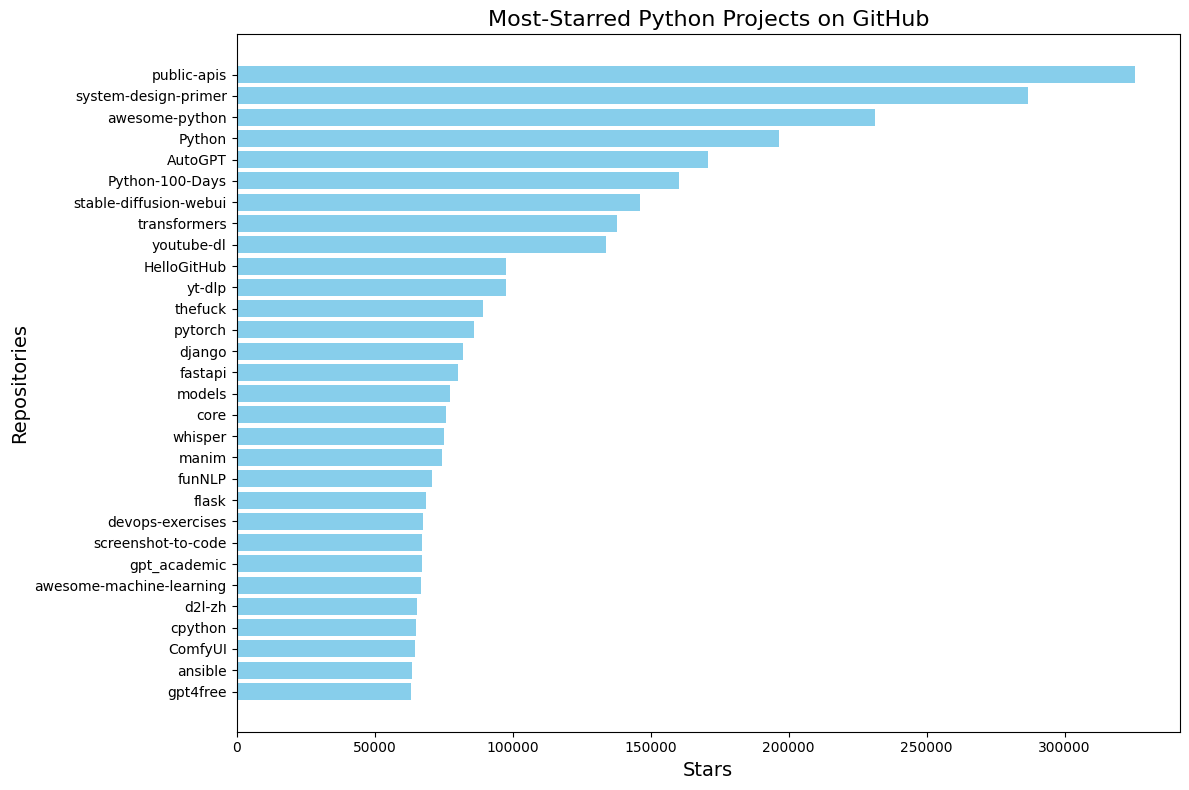

In [1]:
import requests
import matplotlib.pyplot as plt

# Make an API call and store the response.
URL = 'https://api.github.com/search/repositories?q=language:python&sort=stars'
response = requests.get(URL)
print("Status code:", response.status_code)

if response.status_code == 200:
    # Process the API response.
    response_dict = response.json()
    print("Total repositories:", response_dict['total_count'])

    # Extract repository data.
    repo_dicts = response_dict['items']
    names, stars = [], []

    for repo_dict in repo_dicts:
        names.append(repo_dict['name'])
        stars.append(repo_dict['stargazers_count'])

    # Create the bar chart using Matplotlib.
    plt.figure(figsize=(12, 8))
    plt.barh(names, stars, color='skyblue')
    plt.xlabel('Stars', fontsize=14)
    plt.ylabel('Repositories', fontsize=14)
    plt.title('Most-Starred Python Projects on GitHub', fontsize=16)
    plt.gca().invert_yaxis()  # Invert y-axis to have the highest stars at the top
    plt.tight_layout()

    # Display the plot.
    plt.show()

else:
    print("Failed to retrieve data from GitHub API.")


_The most-starred Python projects on GitHub_

## Refining the Chart

Let’s refine the styling of our chart. We’ll be making a few different customizations, so first restructure the code slightly by creating a configuration object that contains all of our customizations to pass to Bar()

Status code: 200
Total repositories: 18776616


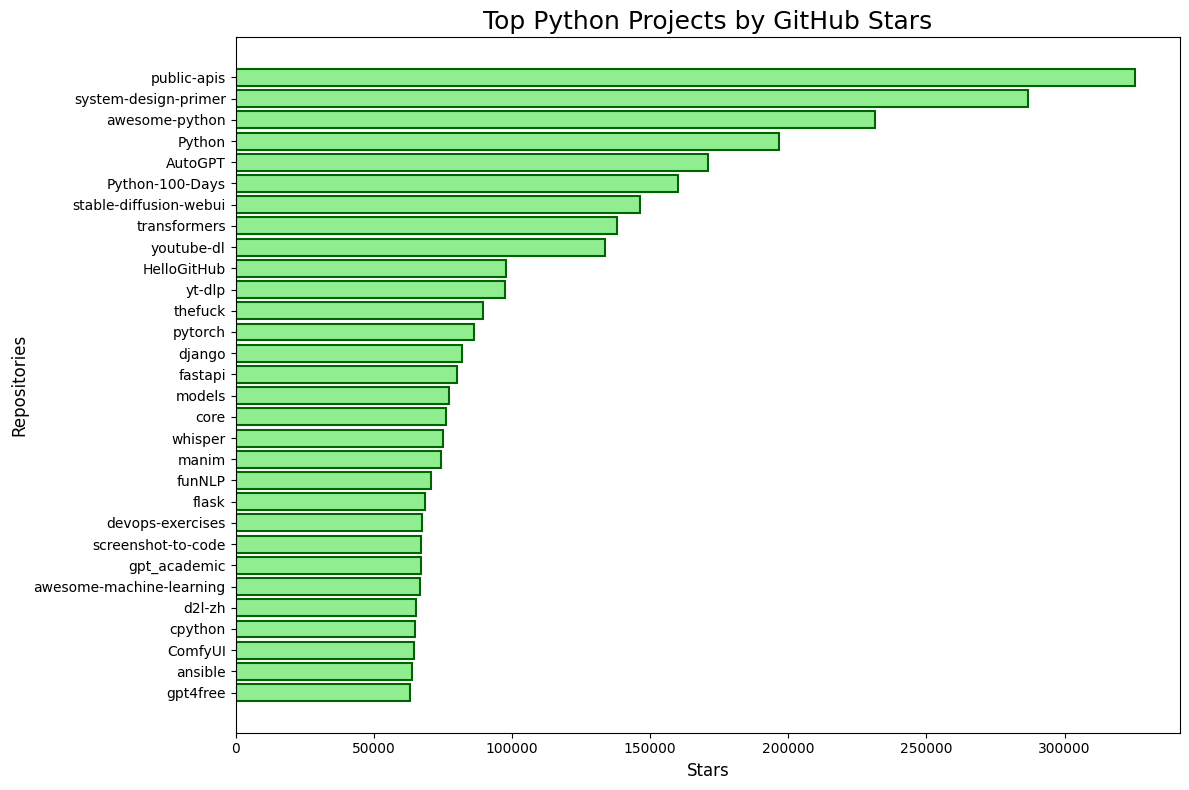

In [3]:
import requests
import matplotlib.pyplot as plt

# Define a configuration object for bar chart customizations.
class BarChartConfig:
    def __init__(self, bar_color='skyblue', edge_color='black', edge_width=1.2, title='Most-Starred Python Projects on GitHub',
                 xlabel='Stars', ylabel='Repositories', title_fontsize=16, label_fontsize=14, invert_yaxis=True):
        self.bar_color = bar_color
        self.edge_color = edge_color
        self.edge_width = edge_width
        self.title = title
        self.xlabel = xlabel
        self.ylabel = ylabel
        self.title_fontsize = title_fontsize
        self.label_fontsize = label_fontsize
        self.invert_yaxis = invert_yaxis

# Instantiate the chart configuration object with desired properties.
chart_config = BarChartConfig(
    bar_color='lightgreen',
    edge_color='darkgreen',
    edge_width=1.5,
    title='Top Python Projects by GitHub Stars',
    xlabel='Stars',
    ylabel='Repositories',
    title_fontsize=18,
    label_fontsize=12,
    invert_yaxis=True
)

# Make an API call and store the response.
URL = 'https://api.github.com/search/repositories?q=language:python&sort=stars'
response = requests.get(URL)
print("Status code:", response.status_code)

if response.status_code == 200:
    # Process the API response.
    response_dict = response.json()
    print("Total repositories:", response_dict['total_count'])

    # Extract repository data.
    repo_dicts = response_dict['items']
    names, stars = [], []

    for repo_dict in repo_dicts:
        names.append(repo_dict['name'])
        stars.append(repo_dict['stargazers_count'])

    # Create the bar chart using the configuration object.
    plt.figure(figsize=(12, 8))
    bars = plt.barh(
        names, 
        stars, 
        color=chart_config.bar_color, 
        edgecolor=chart_config.edge_color, 
        linewidth=chart_config.edge_width
    )

    # Add labels and title with configurations.
    plt.xlabel(chart_config.xlabel, fontsize=chart_config.label_fontsize)
    plt.ylabel(chart_config.ylabel, fontsize=chart_config.label_fontsize)
    plt.title(chart_config.title, fontsize=chart_config.title_fontsize)

    # Optional: invert the y-axis for better visual hierarchy.
    if chart_config.invert_yaxis:
        plt.gca().invert_yaxis()

    plt.tight_layout()

    # Display the plot.
    plt.show()

else:
    print("Failed to retrieve data from GitHub API.")


_The styling for the chart has been refined_

## Plotting the Data

To plot our data, we’ll generate plot_dicts automatically for the 30 projects returned by the API call.

In [4]:
import requests
import plotly.graph_objects as go

# Define a configuration object for bar chart customizations.
class BarChartConfig:
    def __init__(self, bar_color='skyblue', title='Most-Starred Python Projects on GitHub',
                 xlabel='Stars', ylabel='Repositories', title_fontsize=16, label_fontsize=14):
        self.bar_color = bar_color
        self.title = title
        self.xlabel = xlabel
        self.ylabel = ylabel
        self.title_fontsize = title_fontsize
        self.label_fontsize = label_fontsize

# Instantiate the chart configuration object with desired properties.
chart_config = BarChartConfig(
    bar_color='lightgreen',
    title='Top Python Projects by GitHub Stars',
    xlabel='Stars',
    ylabel='Repositories',
    title_fontsize=18,
    label_fontsize=12
)

# Make an API call and store the response.
URL = 'https://api.github.com/search/repositories?q=language:python&sort=stars&per_page=30'
response = requests.get(URL)
print("Status code:", response.status_code)

if response.status_code == 200:
    # Process the API response.
    response_dict = response.json()
    print("Total repositories:", response_dict['total_count'])

    # Extract repository data.
    repo_dicts = response_dict['items']
    names, stars, descriptions = [], [], []

    for repo_dict in repo_dicts:
        names.append(repo_dict['name'])
        stars.append(repo_dict['stargazers_count'])
        descriptions.append(repo_dict['description'] or "No description provided.")  # Handle missing descriptions

    # Create the bar chart using Plotly
    fig = go.Figure(data=[go.Bar(
        x=stars,
        y=names,
        orientation='h',  # Horizontal bar chart
        marker=dict(color=chart_config.bar_color),
        hovertext=descriptions,  # Tooltips will show the descriptions
        hoverinfo='text',  # Only show the hovertext
    )])

    # Add labels and title with configurations
    fig.update_layout(
        title=chart_config.title,
        title_font_size=chart_config.title_fontsize,
        xaxis_title=chart_config.xlabel,
        yaxis_title=chart_config.ylabel,
        xaxis=dict(tickfont=dict(size=chart_config.label_fontsize)),
        yaxis=dict(tickfont=dict(size=chart_config.label_fontsize)),
    )

    # Display the plot.
    fig.show()

else:
    print("Failed to retrieve data from GitHub API.")



Status code: 200
Total repositories: 18778476


_Hovering over a bar shows the project’s description._

## Adding Clickable Links to Our Graph

We can use each bar in the chart as a link to a website. To add this capability, we just add one line to our code, leveraging the dictionary we’ve set up for each project.

In [1]:
import requests
import plotly.express as px
import webbrowser  # Library to open links in the default web browser

# Make an API call and store the response.
URL = 'https://api.github.com/search/repositories?q=language:python&sort=stars&per_page=30'
response = requests.get(URL)
print("Status code:", response.status_code)

if response.status_code == 200:
    # Process the API response.
    response_dict = response.json()
    print("Total repositories:", response_dict['total_count'])

    # Extract repository data.
    repo_dicts = response_dict['items']
    names, stars, descriptions, urls = [], [], [], []

    for repo_dict in repo_dicts:
        names.append(repo_dict['name'])
        stars.append(repo_dict['stargazers_count'])
        descriptions.append(repo_dict['description'] or "No description provided.")  # Handle missing descriptions
        urls.append(repo_dict['html_url'])  # Get repository URL

    # Create a DataFrame for plotting
    data = {
        'Repository': names,
        'Stars': stars,
        'Description': descriptions,
        'URL': urls
    }

    # Create a plotly bar chart
    fig = px.bar(data, x='Stars', y='Repository', orientation='h', 
                 hover_data={'Description': True, 'URL': True},
                 title='Top Python Projects by GitHub Stars',
                 labels={'Stars': 'Stars', 'Repository': 'Repositories'})

    # Add click behavior: Open the URL in the default web browser
    fig.update_traces(marker=dict(color='lightgreen', line=dict(color='darkgreen', width=1.5)))

    # Add a custom JavaScript callback for clicking on bars
    fig.update_layout(
        clickmode='event+select',
        hoverlabel=dict(bgcolor='white', font_size=14, font_family="Rockwell")
    )

    # Show the figure
    fig.show()

else:
    print("Failed to retrieve data from GitHub API.")


Status code: 200
Total repositories: 18778575


_bars equipped with links to the individual repositories_